In [ ]:
# NOT DONE YET: gives some errors in log 2

In [1]:
# set wd
import os

os.chdir('C:/Users/User/Desktop/SCUOLA/UNI/2.Magistrale/TESI/Causal_Inference_for_Multivariate_Time_Series/Code/Python code/real world data/Hybrid file')

In [5]:
# Load, clean & save
from Custom_dataset_loader_2 import dataframe_storer

processor = dataframe_storer('C:/Users/User/Desktop/SCUOLA/UNI/2.Magistrale/TESI/Causal_Inference_for_Multivariate_Time_Series/Code/Python code/real world data/Hybrid file/data/veilleux', 'veilleux_dataframes.pkl', folder=True)
dfs = processor.load_data()
processor.clean_data(column_to_remove=None, column_name=None)
processor.save_data()

NameError: name 'pd' is not defined

In [6]:
# Analyse
processor.analyze_dataset('preprocessed_1')
processor.analyze_dataset('preprocessed_2')

Dataset preprocessed_1 not found in the dictionary.
Dataset preprocessed_2 not found in the dictionary.


In [7]:
# Make nodes
from Custom_dataset_loader_2 import NodesNAmeMaker

column_mapper = NodesNAmeMaker(dfs)

# preprocessed_1
output_text = column_mapper.map_columns('preprocessed_1')
if output_text:
    print(output_text)
    # Save the output to a text file
    column_mapper.save_output(output_text, 'nodes_preprocessed_1.txt')

# preprocessed_2
output_text = column_mapper.map_columns('preprocessed_1')
if output_text:
    print(output_text)
    # Save the output to a text file
    column_mapper.save_output(output_text, 'nodes_preprocessed_2.txt')
 
# display the saved outputs
with open('nodes_preprocessed_1.txt', 'r') as file:
    print(file.read())

NameError: name 'dfs' is not defined

Nodes: ['J', 'G', 'E', 'F', 'B', 'A', 'C', 'I', 'D', 'H']
Adjacency Matrix:
 [[0 1 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


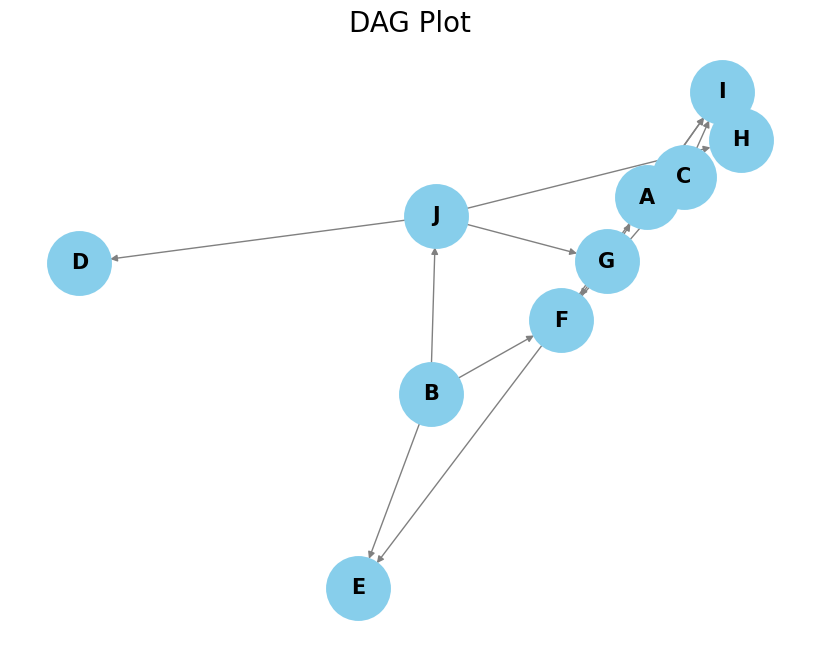

Nodes: ['J', 'G', 'E', 'F', 'B', 'A', 'C', 'I', 'D', 'H']
Adjacency Matrix:
 [[0 1 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


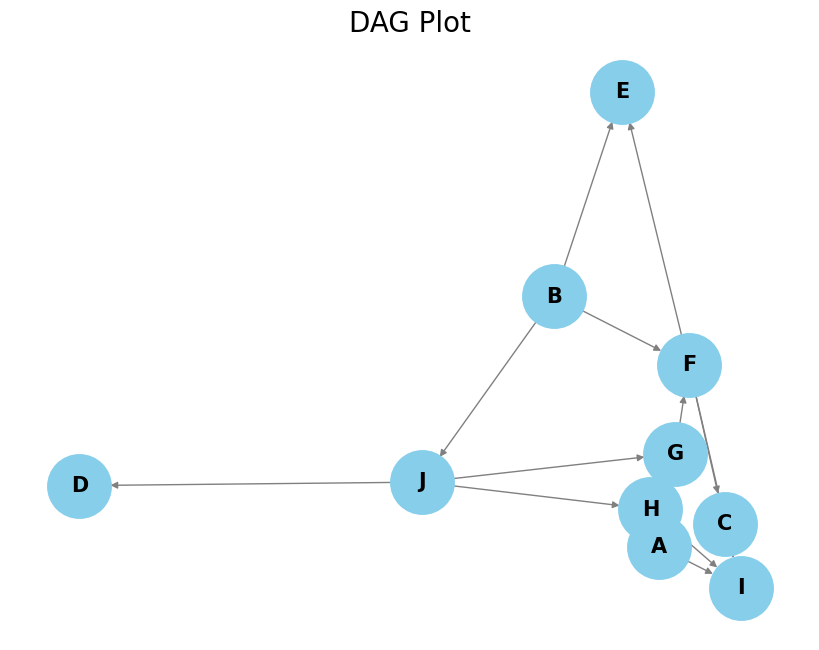

In [8]:
# Make DAG
from Custom_dataset_loader_2 import DAG_maker

processor = DAG_maker()

'''
Net_In_Global -> Net_Out_Global
Net_In_Global -> Nb_process_http
Net_In_Global -> Nb_connection_mysql
Nb_process_http -> Cpu_http
Nb_process_http -> Nb_process_php
Nb_process_http -> Ram_http
Nb_process_php -> Cpu_php
Nb_process_php -> Nb_connection_mysql
Nb_connection_mysql -> Net_Out_Global
Nb_connection_mysql -> Disque_write_global
Nb_connection_mysql -> Cpu_global
Cpu_http -> Cpu_global
Cpu_php -> Cpu_global
Disque_write_global -> Cpu_global

A: Cpu_php
B: Net_In_Global
C: Disque_write_global
D: Ram_http
E: Net_Out_Global
F: Nb_connection_mysql
G: Nb_process_php
H: Cpu_http
I: Cpu_global
J: Nb_process_http
'''

# preprocessed_1
nodes, adj_matrix = processor.dag_to_adj_matrix('B->E, B->J, B->F, J->H, J->G, J->D, G->A, G->F, F->E, F->C, F->I, H->I, A->I, C->I')
print("Nodes:", nodes)
print("Adjacency Matrix:\n", adj_matrix)
processor.adj_matrix_to_graph(nodes, adj_matrix)
processor.plot_graph()

# preprocessed_2
nodes, adj_matrix = processor.dag_to_adj_matrix('B->E, B->J, B->F, J->H, J->G, J->D, G->A, G->F, F->E, F->C, F->I, H->I, A->I, C->I')
print("Nodes:", nodes)
print("Adjacency Matrix:\n", adj_matrix)
processor.adj_matrix_to_graph(nodes, adj_matrix)
processor.plot_graph()